In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import tqdm

%run ../Scripts/analysisMethods.py
%run ../Scripts/supMethods.py
%run ../Scripts/entropy.py
%run ../Scripts/trajectory.py
foldername = "../Data_Long/mu_power-1.25_seed0/"

Missing folder


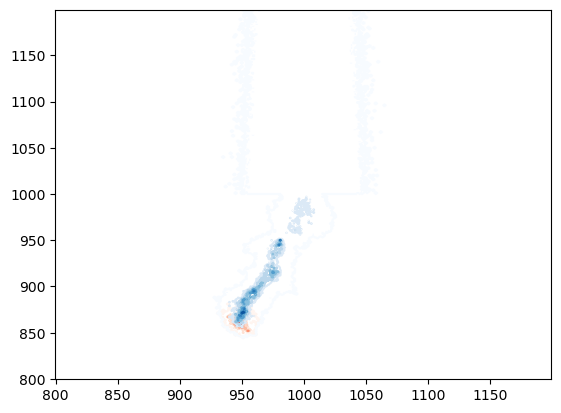

In [3]:
t_dom, foldername, margins = get_tdomain_and_show_last_output(foldername, (-0.35, -0.35))
params, sim_params = read_json(foldername)

In [4]:
%run ../Scripts/fitness.py
%run ../Scripts/mutation.py

In [ ]:
entropy_change_time = []
entropy_change_mutation_time = []
entropy_change_growth_time = []
entropy_change_remainder_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[800:]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)
    n_intermediate = virus_growth(n_old, f_norm, params, sim_params)
    n_mutated = mutation(n_intermediate, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)
    entropy_change_remainder = compute_entropy_change(n_new, n_intermediate)
    # entropy_change_mutation = compute_entropy_production_2D_mutation(n_intermediate, params, sim_params)
    entropy_change_mutation = compute_entropy_change(n_mutated, n_intermediate)
    entropy_change = compute_entropy_change(n_new, n_old)

    entropy_change_time.append(entropy_change)
    entropy_change_mutation_time.append(entropy_change_mutation)
    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_remainder_time.append(entropy_change_remainder)
    t_range.append(t)
    n_old = n_new


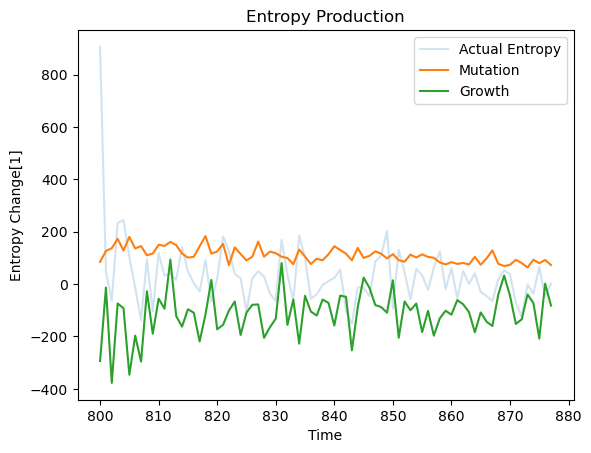

In [ ]:
plt.figure()
plt.plot(t_range, entropy_change_time, alpha = 0.2, label = "Actual Entropy")
plt.plot(t_range, entropy_change_mutation_time, label = "Mutation")
plt.plot(t_range, entropy_change_growth_time, label = "Growth")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()

In [31]:
np.mean(entropy_change_growth_time)

-111.49444454887406

In [32]:
np.mean(entropy_change_time)

33.3721896372279

In [33]:
np.mean(entropy_change_mutation_time)

109.94510055002225

In [54]:
%run ../Scripts/entropy.py

In [55]:
entropy_change_growth_time = []
entropy_change_fitness_time = []
t_range = []
n_old, nh_old, f_old = load_outputs(foldername, t_dom[0], True)

for t in t_dom[800:]:
    n_new, nh_new, f_new = load_outputs(foldername, t, True)
    f_norm = norm_fitness(f_new, n_old, params, sim_params)

    n_intermediate = virus_growth(n_old, f_norm, params, sim_params)
    f_var = compute_fitness_variance(f_norm, n_old, params, sim_params)

    entropy_change_growth = compute_entropy_change(n_intermediate, n_old)

    entropy_change_growth_time.append(entropy_change_growth)
    entropy_change_fitness_time.append(f_var)
    t_range.append(t)
    n_old = n_new

In [68]:
var_f_n = np.sum(np.power(f_norm.toarray(), 2)*n_old.toarray())
mean_f_n = np.sum(f_norm.toarray()*n_old.toarray())

x_ind, y_ind = np.nonzero(n_old)
non_zero_values = n_old[x_ind, y_ind].toarray().squeeze()
non_zero_fitness = f_norm[x_ind, y_ind].toarray().squeeze()
f_log_n = np.sum(non_zero_fitness*non_zero_values*np.log(non_zero_values))

In [74]:
var_f_n+mean_f_n+f_log_n

-5.817499468708573

In [72]:
np.mean(entropy_change_growth_time)

-103.24829504298928

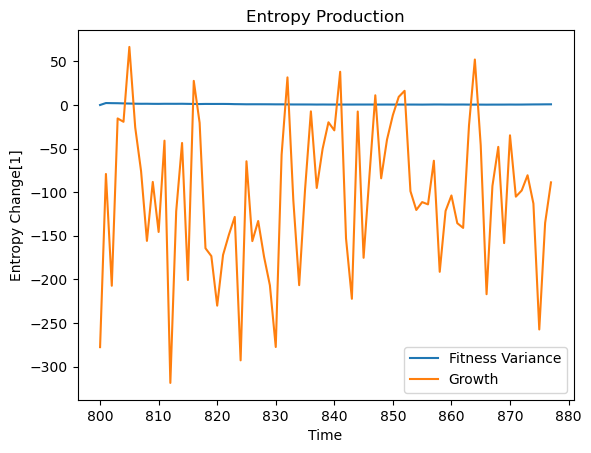

In [73]:
plt.figure()
plt.plot(t_range, entropy_change_fitness_time, label = "Fitness Variance")
plt.plot(t_range, entropy_change_growth_time, label = "Growth")
plt.title("Entropy Production")
plt.ylabel("Entropy Change[1]")
plt.xlabel("Time")
plt.legend()

In [17]:
foldernames = []
list_to_sweep = [-1, -1.5, -1.25, -1.75, -2, -2.5, -2.25, -2.75, -3]

for i in list_to_sweep:
    foldernames.append(f"../Data_Long/mu_power{i}_seed0")

foldernames

['../Data_Long/mu_power-1_seed0',
 '../Data_Long/mu_power-1.5_seed0',
 '../Data_Long/mu_power-1.25_seed0',
 '../Data_Long/mu_power-1.75_seed0',
 '../Data_Long/mu_power-2_seed0',
 '../Data_Long/mu_power-2.5_seed0',
 '../Data_Long/mu_power-2.25_seed0',
 '../Data_Long/mu_power-2.75_seed0',
 '../Data_Long/mu_power-3_seed0']

In [26]:
entropy_change_mutation_mu = []
entropy_change_mu = []
mutation_rates = []
for folder in foldernames:
    print(folder)
    entropy_change_time = []
    entropy_change_mutation_time = []
    entropy_change_remainder_time = []
    t_range = []
    t_dom, _, _ = get_tdomain_and_show_last_output(folder, to_plot=False)
    
    n_old, nh_old = load_outputs(folder, t_dom[0], add_fitness = False)
    for t in t_dom:
        n_new, nh_new = load_outputs(folder, t, add_fitness = False)
        n_mutated = mutation(n_new, params, sim_params)

        entropy_change_mutation = compute_entropy_change(n_mutated, n_new)
        entropy_change = compute_entropy_change(n_new, n_old)

        entropy_change_time.append(entropy_change)
        entropy_change_mutation_time.append(entropy_change_mutation)
        t_range.append(t)
        n_old = n_new
    
    entropy_change_mutation_mu.append(np.mean(entropy_change_mutation_time))
    entropy_change_mu.append(np.mean(entropy_change_time))

../Data_Long/mu_power-1_seed0
../Data_Long/mu_power-1.5_seed0
../Data_Long/mu_power-1.25_seed0
../Data_Long/mu_power-1.75_seed0
../Data_Long/mu_power-2_seed0
../Data_Long/mu_power-2.5_seed0
../Data_Long/mu_power-2.25_seed0
../Data_Long/mu_power-2.75_seed0
../Data_Long/mu_power-3_seed0


In [22]:
entropy_change_mutation_mu

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

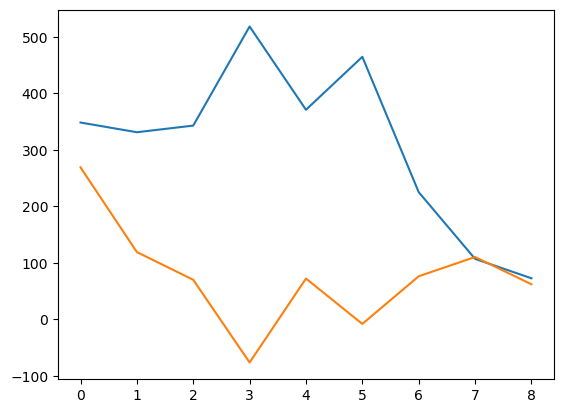

In [29]:
plt.figure()
plt.plot(entropy_change_mutation_mu)
plt.plot(entropy_change_mu)